In [95]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df = pd.read_csv("Data Science Salaries.csv")
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [97]:
df = df.rename(
    columns={
        'job_title': 'Job Title',
        'experience_level': 'Experience Level',
        'employment_type': 'Employment Type',
        'work_models': 'Work Models',
        'work_year': 'Work Year',
        'employee_residence': 'Employee Residence',
        'salary': 'Salary',
        'salary_currency': 'Salary Currency',
        'salary_in_usd': 'Salary in USD',
        'company_location': 'Company Location',
        'company_size': 'Company Size'
    }
)

In [98]:
df.columns

Index(['Job Title', 'Experience Level', 'Employment Type', 'Work Models',
       'Work Year', 'Employee Residence', 'Salary', 'Salary Currency',
       'Salary in USD', 'Company Location', 'Company Size'],
      dtype='object')

In [99]:
df['Experience Level'].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

<Axes: title={'center': 'Salary By Experience'}, xlabel='Experience Level'>

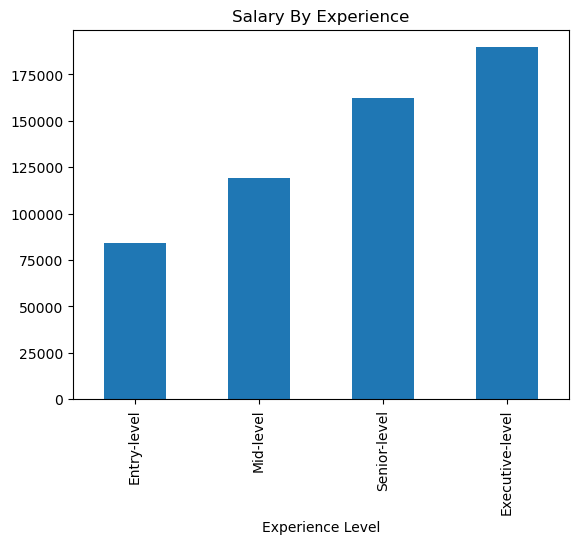

In [100]:
#Plot the income to the experience level
income_experience_df = df.groupby('Experience Level')['Salary in USD'].mean().sort_values()
income_experience_df.plot(kind='bar', title='salary by experience'.title())

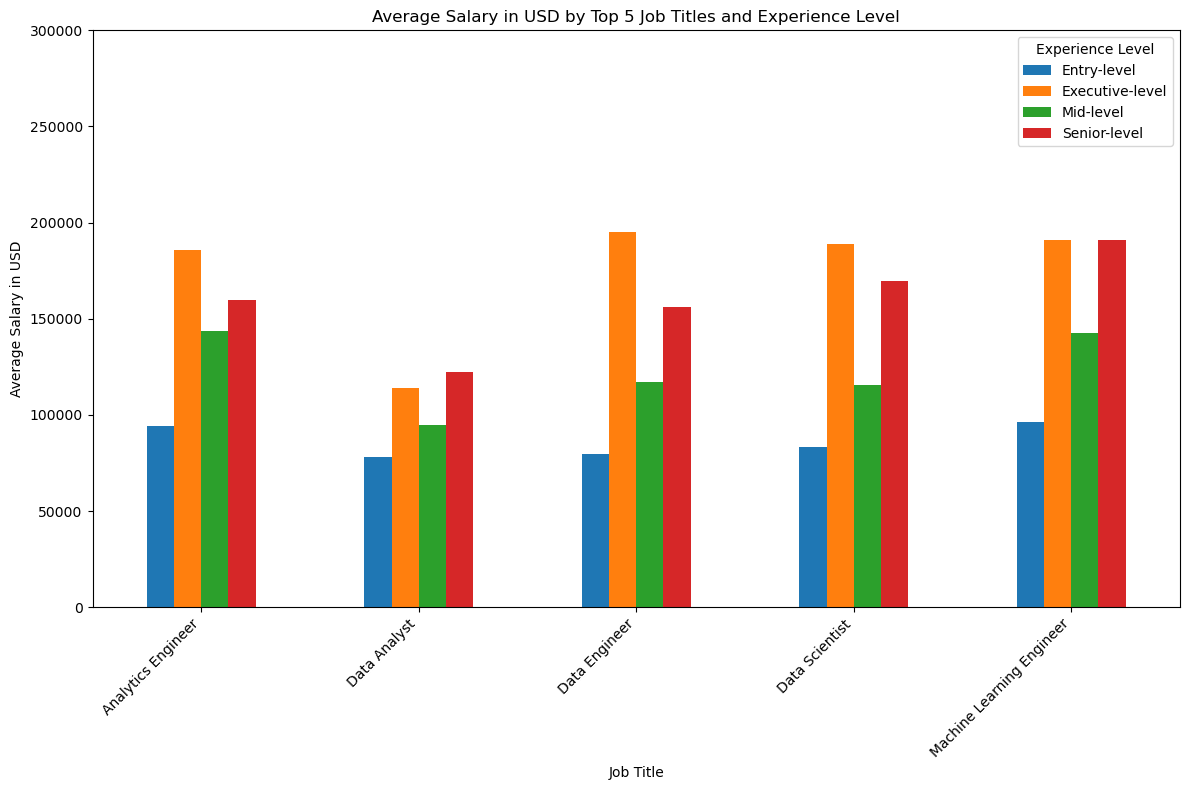

In [101]:
top_5_job_titles = df['Job Title'].value_counts().head(5).index
top_5_df = df[df['Job Title'].isin(top_5_job_titles)]
top_5_salaries_experience = top_5_df.groupby(['Job Title', 'Experience Level'])['Salary in USD'].mean().sort_values().unstack()
top_5_salaries_experience.plot(kind='bar', figsize=(12, 8))
plt.title('Average Salary in USD by Top 5 Job Titles and Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.ylim(0, 300000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

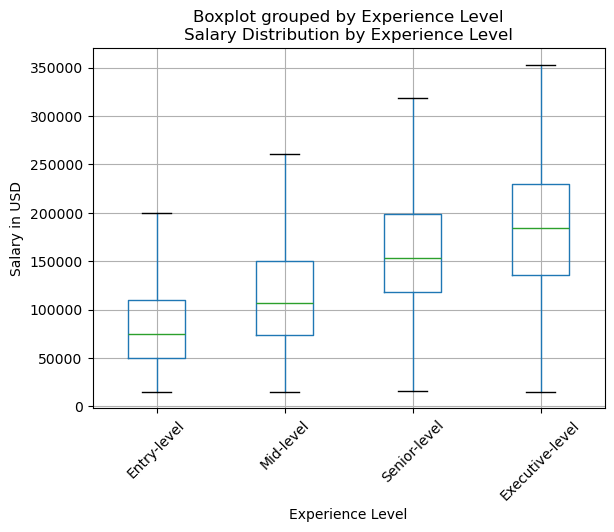

In [102]:
# Create a box plot of salary_in_usd for each experience_level category, excluding outliers
df['Experience Level'] = pd.Categorical(df['Experience Level'], categories=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'], ordered=True)
df.boxplot(column='Salary in USD', by='Experience Level', showfliers=False)


# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Experience Level')
plt.xticks(rotation=45)

# Display the plot
plt.show()